<a href="https://colab.research.google.com/github/ez945y/Kaggle_ML/blob/main/HouseSalePricePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()

MessageError: ignored

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 66.5MB/s]


In [ ]:
! mkdir house-prices2

In [ ]:
! unzip house-prices-advanced-regression-techniques.zip -d house-prices2

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices2/data_description.txt  
  inflating: house-prices2/sample_submission.csv  
  inflating: house-prices2/test.csv  
  inflating: house-prices2/train.csv  


In [ ]:
import pandas as pd
import numpy as np
df_data = pd.read_csv('house-prices2/train.csv')
df_test = pd.read_csv('house-prices2/test.csv')
df_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
Id = df_test['Id']

In [ ]:
import pandas as pd
import numpy as np
import time


import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_data.describe().T.style.background_gradient(subset=['min','50%', 'max'], cmap='winter')

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


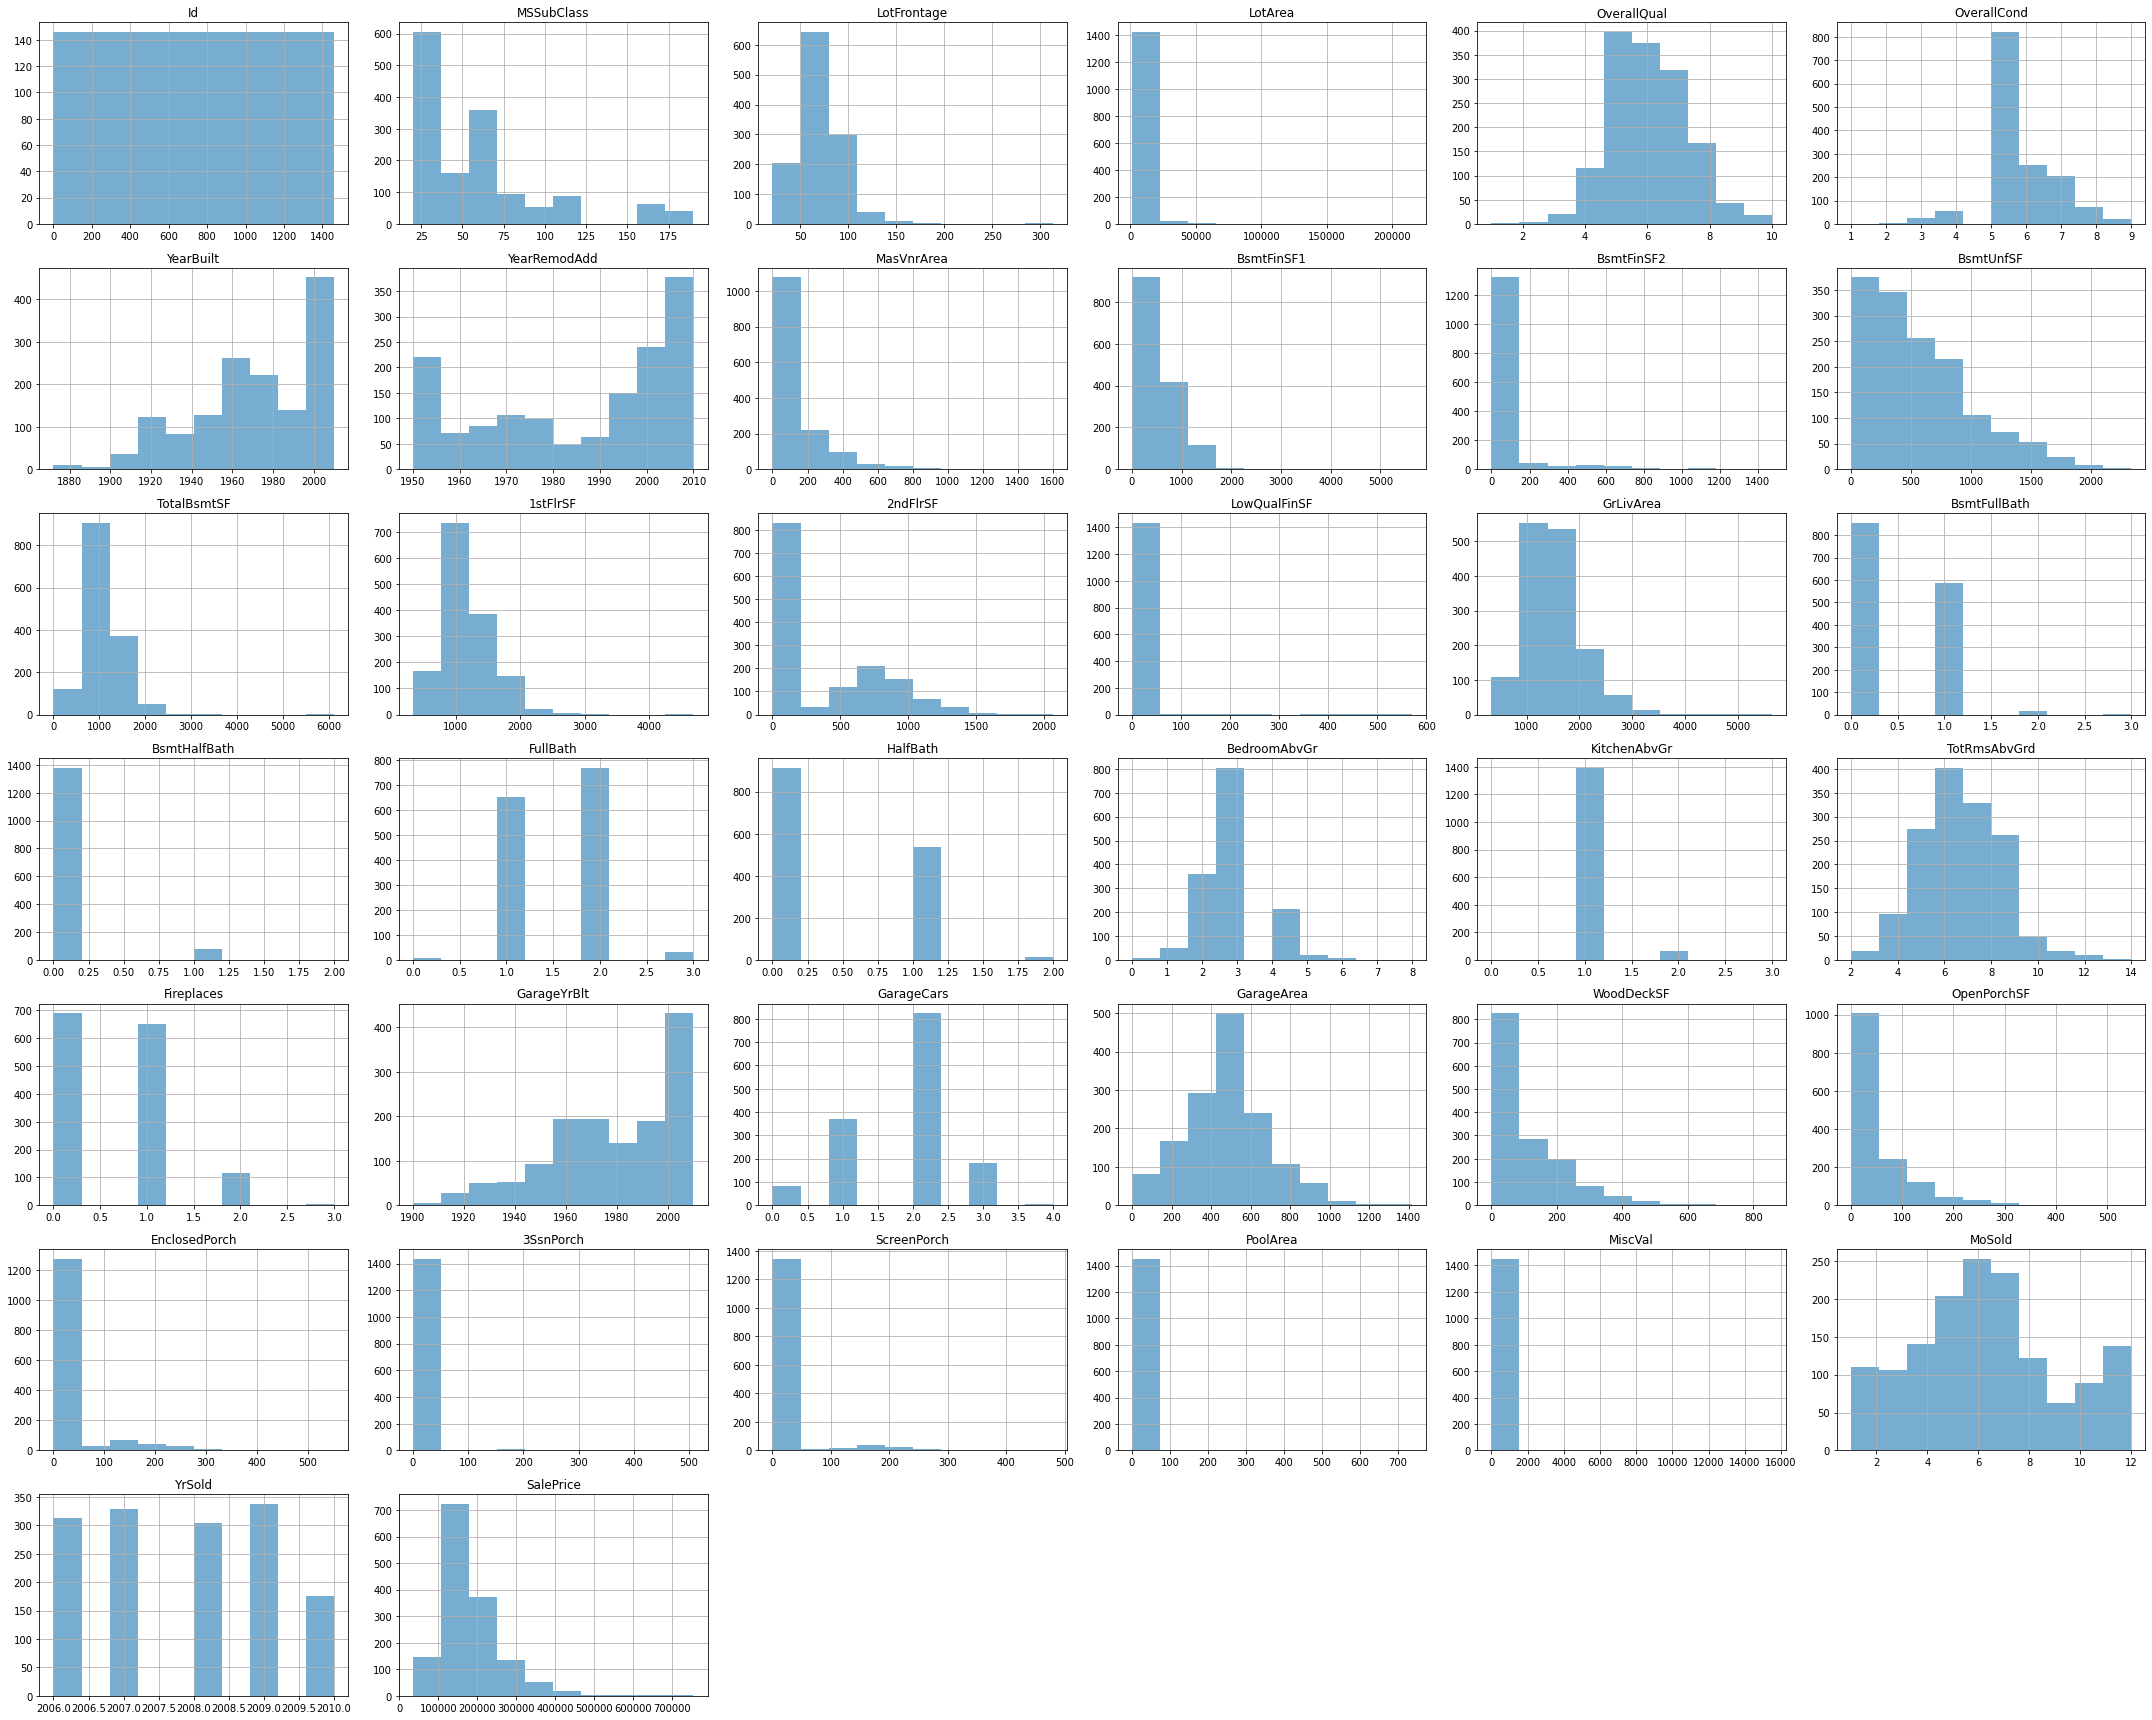

In [ ]:
df_data.hist(alpha=0.6, figsize=(30,24))
plt.tight_layout()
plt.show()

In [ ]:
df_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

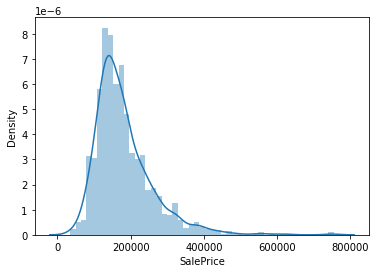

In [ ]:
sns.distplot(df_data['SalePrice']);

In [ ]:
var = 'GrLivArea'
data = pd.concat([df_data['SalePrice'], df_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_data['SalePrice'], df_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_data['SalePrice'], df_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_data['SalePrice'], df_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
corrmat = df_data.corr()
mask=np.triu(np.ones_like(corrmat, dtype=bool))
corr1=corrmat.copy()
fig, ax = plt.subplots(figsize=(14,10))   
sns.heatmap(mask=mask, data=corr1, vmax=.8, square=True, cmap="RdBu_r", annot_kws={'fontsize':10,'fontweight':'bold'})
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations between Balance Variables\n', fontsize=16)
fig.show()

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'fontsize':10}, yticklabels=cols.values, xticklabels=cols.values, cmap="RdBu_r")
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_data[cols], height = 1.5)
plt.show()

In [ ]:
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [ ]:
df_data = df_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1)

In [ ]:
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1)

In [ ]:
numeric_train = df_data[['Id','LotFrontage','LotArea','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]
numeric_train

,Id,LotFrontage,LotArea,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,1,65.0,8450,1710,548,856,856,854,208500
1,2,80.0,9600,1262,460,1262,1262,0,181500
2,3,68.0,11250,1786,608,920,920,866,223500
3,4,60.0,9550,1717,642,756,961,756,140000
4,5,84.0,14260,2198,836,1145,1145,1053,250000
...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1647,460,953,953,694,175000
1456,1457,85.0,13175,2073,500,1542,2073,0,210000
1457,1458,66.0,9042,2340,252,1152,1188,1152,266500
1458,1459,68.0,9717,1078,240,1078,1078,0,142125


In [ ]:
numeric_test = df_test[['Id','LotFrontage','LotArea','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF']]
numeric_test

,Id,LotFrontage,LotArea,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF
0,1461,80.0,11622,896,730.0,882.0,896,0
1,1462,81.0,14267,1329,312.0,1329.0,1329,0
2,1463,74.0,13830,1629,482.0,928.0,928,701
3,1464,78.0,9978,1604,470.0,926.0,926,678
4,1465,43.0,5005,1280,506.0,1280.0,1280,0
...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,1092,0.0,546.0,546,546
1455,2916,21.0,1894,1092,286.0,546.0,546,546
1456,2917,160.0,20000,1224,576.0,1224.0,1224,0
1457,2918,62.0,10441,970,0.0,912.0,970,0


In [ ]:
df_data['YrSold'].isnull().sum().max()

0

In [ ]:
cate_train = df_data[['Id','LotConfig','Neighborhood','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','GarageType','GarageQual','GarageFinish','GarageCond','SaleCondition','MasVnrType','KitchenAbvGr','KitchenQual','Fireplaces','YrSold','MoSold']]
cate_train

,Id,LotConfig,Neighborhood,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageType,GarageQual,GarageFinish,GarageCond,SaleCondition,MasVnrType,KitchenAbvGr,KitchenQual,Fireplaces,YrSold,MoSold
0,1,Inside,CollgCr,Gd,TA,No,GLQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,BrkFace,1,Gd,0,2008,2
1,2,FR2,Veenker,Gd,TA,Gd,ALQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,None,1,TA,1,2007,5
2,3,Inside,CollgCr,Gd,TA,Mn,GLQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,BrkFace,1,Gd,1,2008,9
3,4,Corner,Crawfor,TA,Gd,No,ALQ,Unf,Gd,Detchd,TA,Unf,TA,Abnorml,None,1,Gd,1,2006,2
4,5,FR2,NoRidge,Gd,TA,Av,GLQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,BrkFace,1,Gd,1,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Inside,Gilbert,Gd,TA,No,Unf,Unf,Ex,Attchd,TA,RFn,TA,Normal,None,1,TA,1,2007,8
1456,1457,Inside,NWAmes,Gd,TA,No,ALQ,Rec,TA,Attchd,TA,Unf,TA,Normal,Stone,1,TA,2,2010,2
1457,1458,Inside,Crawfor,TA,Gd,No,GLQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,None,1,Gd,2,2010,5
1458,1459,Inside,NAmes,TA,TA,Mn,GLQ,Rec,Gd,Attchd,TA,Unf,TA,Normal,None,1,Gd,0,2010,4


In [ ]:
cate_test = df_test[['LotConfig','Neighborhood','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','GarageType','GarageQual','GarageFinish','GarageCond','SaleCondition','MasVnrType','KitchenAbvGr','KitchenQual','Fireplaces','YrSold','MoSold']]
cate_test

,LotConfig,Neighborhood,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageType,GarageQual,GarageFinish,GarageCond,SaleCondition,MasVnrType,KitchenAbvGr,KitchenQual,Fireplaces,YrSold,MoSold
0,Inside,NAmes,TA,TA,No,Rec,LwQ,TA,Attchd,TA,Unf,TA,Normal,None,1,TA,0,2010,6
1,Corner,NAmes,TA,TA,No,ALQ,Unf,TA,Attchd,TA,Unf,TA,Normal,BrkFace,1,Gd,0,2010,6
2,Inside,Gilbert,Gd,TA,No,GLQ,Unf,Gd,Attchd,TA,Fin,TA,Normal,None,1,TA,1,2010,3
3,Inside,Gilbert,TA,TA,No,GLQ,Unf,Ex,Attchd,TA,Fin,TA,Normal,BrkFace,1,Gd,1,2010,6
4,Inside,StoneBr,Gd,TA,No,ALQ,Unf,Ex,Attchd,TA,RFn,TA,Normal,None,1,Gd,0,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Inside,MeadowV,TA,TA,No,Unf,Unf,Gd,NaN,NaN,NaN,NaN,Normal,None,1,TA,0,2006,6
1455,Inside,MeadowV,TA,TA,No,Rec,Unf,TA,CarPort,TA,Unf,TA,Abnorml,None,1,TA,0,2006,4
1456,Inside,Mitchel,TA,TA,No,ALQ,Unf,Ex,Detchd,TA,Unf,TA,Abnorml,None,1,TA,1,2006,9
1457,Inside,Mitchel,Gd,TA,Av,GLQ,Unf,TA,NaN,NaN,NaN,NaN,Normal,None,1,TA,0,2006,7


In [ ]:
total = cate_train.isnull().sum().sort_values(ascending=False)
percent = (cate_train.isnull().sum()/cate_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
MasVnrType,8,0.005479


In [ ]:
total = cate_test.isnull().sum().sort_values(ascending=False)
percent = (cate_test.isnull().sum()/cate_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461
GarageType,76,0.052090
BsmtCond,45,0.030843
BsmtQual,44,0.030158
BsmtExposure,44,0.030158
BsmtFinType1,42,0.028787
BsmtFinType2,42,0.028787
MasVnrType,16,0.010966


In [ ]:
total = numeric_train.isnull().sum().sort_values(ascending=False)
percent = (numeric_train.isnull().sum()/numeric_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
LotFrontage,259,0.177397
Id,0,0.000000
LotArea,0,0.000000
GrLivArea,0,0.000000


In [ ]:
total = numeric_test.isnull().sum().sort_values(ascending=False)
percent = (numeric_test.isnull().sum()/numeric_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
LotFrontage,227,0.155586
GarageArea,1,0.000685
TotalBsmtSF,1,0.000685
Id,0,0.000000


In [ ]:
for col in ['GarageQual','GarageCond','GarageType','GarageFinish','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType','KitchenQual']:
  cate_train[col] = cate_train[col].fillna('No'+col)

In [ ]:
numeric_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice'],
      dtype='object')

In [ ]:
numeric_train['LotFrontage'] = numeric_train['LotFrontage'].fillna(numeric_train['LotFrontage'].mode()[0])

for col in ['LotFrontage','GarageArea','TotalBsmtSF']:
  numeric_test[col] = numeric_test[col].fillna(numeric_test[col].mode()[0])

In [ ]:
for col in ['GarageQual','GarageCond','GarageType','GarageFinish','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType','KitchenQual']:
  cate_test[col] = cate_test[col].fillna('No'+col)

In [ ]:
saleprice_scaled = StandardScaler().fit_transform(numeric_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


In [ ]:
saleprice_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [ ]:
numeric_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,LotFrontage,LotArea,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1298,1299,313.0,63887,5642,1418,6110,4692,950,160000
523,524,130.0,40094,4676,884,3138,3138,1538,184750


In [ ]:
numeric_train = numeric_train.drop(numeric_train[numeric_train['Id'] == 1299].index)
numeric_train = numeric_train.drop(numeric_train[numeric_train['Id'] == 524].index)

cate_train = cate_train.drop(cate_train[cate_train['Id'] == 1299].index)
cate_train = cate_train.drop(cate_train[cate_train['Id'] == 524].index)

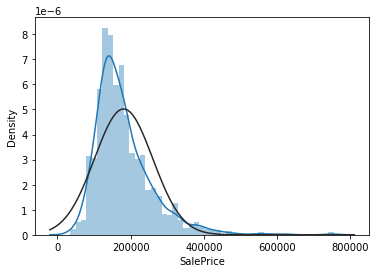

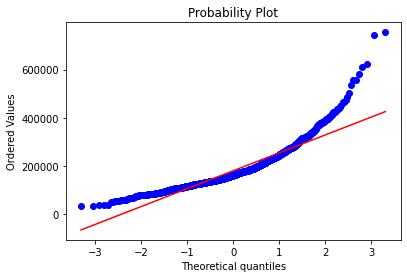

In [ ]:
sns.distplot(numeric_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(numeric_train['SalePrice'], plot=plt)

In [ ]:
numeric_train['SalePrice'] = np.log1p(numeric_train['SalePrice'])

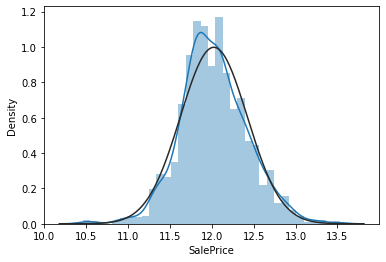

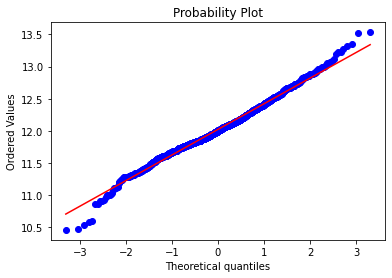

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(numeric_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(numeric_train['SalePrice'], plot=plt)

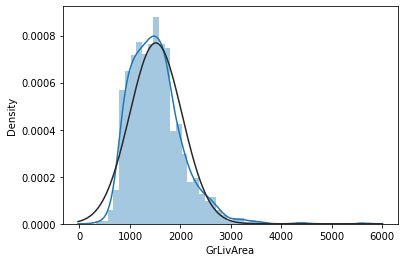

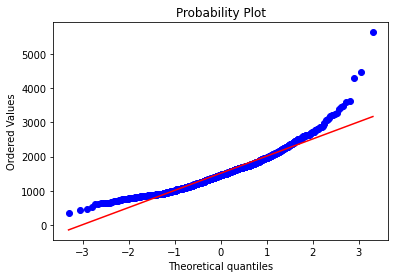

In [ ]:
sns.distplot(numeric_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(numeric_train['GrLivArea'], plot=plt)

In [ ]:
#data transformation
#numeric_train['GrLivArea'] = np.log(numeric_train['GrLivArea'])

In [ ]:
#df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

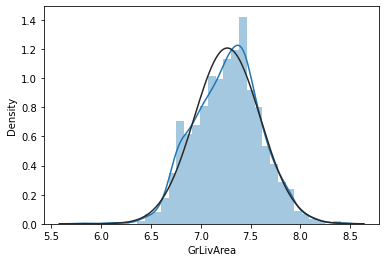

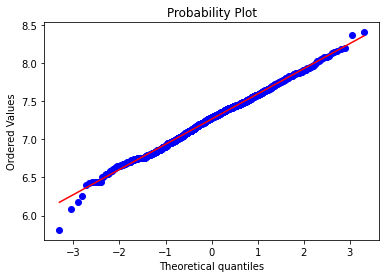

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(numeric_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(numeric_train['GrLivArea'], plot=plt)

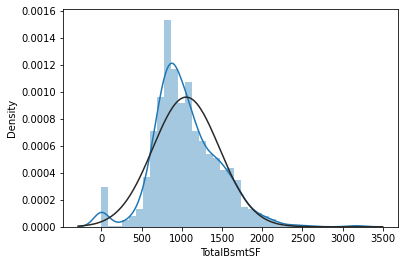

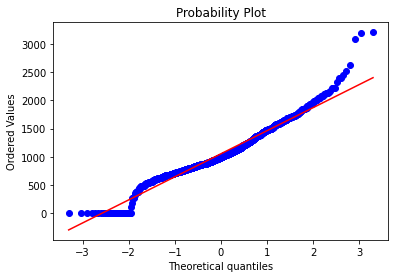

In [ ]:
#histogram and normal probability plot
sns.distplot(numeric_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(numeric_train['TotalBsmtSF'], plot=plt)

In [ ]:
numeric_train['HasBsmt'] = pd.Series(len(numeric_train['TotalBsmtSF']), index=numeric_train.index)
numeric_train['HasBsmt'] = 0 
numeric_train.loc[numeric_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
numeric_test['HasBsmt'] = pd.Series(len(numeric_test['TotalBsmtSF']), index=numeric_test.index)
numeric_test['HasBsmt'] = 0 
numeric_test.loc[numeric_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
numeric_train.loc[numeric_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(numeric_train['TotalBsmtSF'])

In [ ]:
numeric_test.loc[numeric_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(numeric_test['TotalBsmtSF'])

In [ ]:
numeric_train['TotalBsmtSF']

0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
          ...   
1455    6.859615
1456    7.340836
1457    7.049255
1458    6.982863
1459    7.135687
Name: TotalBsmtSF, Length: 1457, dtype: float64

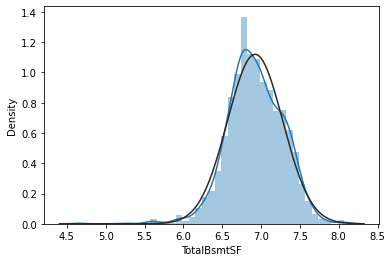

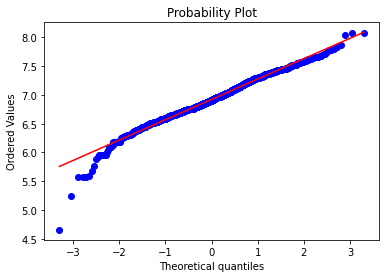

In [ ]:
sns.distplot(numeric_train[numeric_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(numeric_train[numeric_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

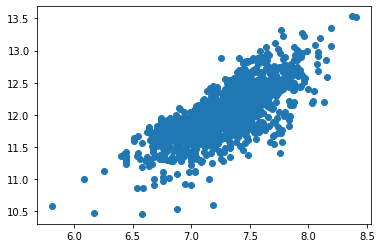

In [ ]:
plt.scatter(numeric_train['GrLivArea'], numeric_train['SalePrice'])

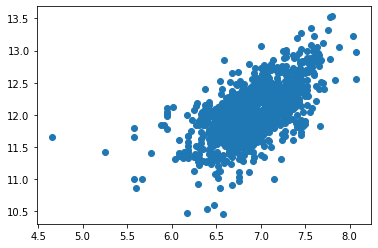

In [ ]:
plt.scatter(numeric_train[numeric_train['TotalBsmtSF']>0]['TotalBsmtSF'], numeric_train[numeric_train['TotalBsmtSF']>0]['SalePrice'])

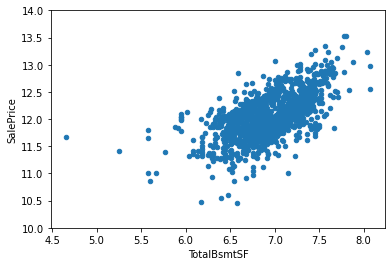

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([numeric_train[numeric_train['TotalBsmtSF']>0]['SalePrice'], numeric_train[numeric_train['TotalBsmtSF']>0][var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(10,14));

In [ ]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing(df_input):
    sc = StandardScaler()   
    df=sc.fit_transform(df_input)
    return df

In [ ]:
numeric_train

,Id,LotFrontage,LotArea,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,1,65.0,8450,1710,548,856,856,854,12.247699
1,2,80.0,9600,1262,460,1262,1262,0,12.109016
2,3,68.0,11250,1786,608,920,920,866,12.317171
3,4,60.0,9550,1717,642,756,961,756,11.849405
4,5,84.0,14260,2198,836,1145,1145,1053,12.429220
...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1647,460,953,953,694,12.072547
1456,1457,85.0,13175,2073,500,1542,2073,0,12.254868
1457,1458,66.0,9042,2340,252,1152,1188,1152,12.493133
1458,1459,68.0,9717,1078,240,1078,1078,0,11.864469


In [ ]:
y = numeric_train['SalePrice']

In [ ]:
numeric_train = numeric_train.drop(['Id','SalePrice'],1)
data = data_preprocessing(numeric_train)
numeric_train = pd.DataFrame(data, columns = numeric_train.columns)

In [ ]:
numeric_train = numeric_train.reset_index(drop="True")

In [ ]:
data = data_preprocessing(numeric_test)
numeric_test = pd.DataFrame(data, columns = numeric_test.columns)

In [ ]:
for col in ['KitchenAbvGr','Fireplaces','YrSold','MoSold']:
  cate_test[col] = cate_test[col].astype(str)
  cate_train[col] = cate_train[col].astype(str)

In [ ]:
cate_test['label'] = -1
data = pd.concat([cate_train.drop('Id',1), cate_test])
features = data.columns[:-1]
for item in features:
  index = data[item].value_counts().index
  data[item] = LabelEncoder().fit_transform(data[item])
  item_dummies = pd.get_dummies(data[item])
  item_dummies.columns = [item +'_'+ col for col in index]
  data = pd.concat([data, item_dummies], axis=1)
data = data.drop(features, axis = 1)
data

,label,LotConfig_Inside,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,...,MoSold_5,MoSold_4,MoSold_8,MoSold_3,MoSold_10,MoSold_9,MoSold_11,MoSold_2,MoSold_1,MoSold_12
0,NaN,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,NaN,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,NaN,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1455,-1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,-1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1457,-1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_train = data[data['label'] != -1]
df_test = data[data['label'] == -1]

df_train = df_train.drop(['label'],axis=1)
df_test = df_test.drop(['label'],axis=1)

In [ ]:
X = pd.concat([df_train.reset_index(drop =True), numeric_train.reset_index(drop =True)], axis =1)

In [ ]:
df_test = pd.concat([df_test.reset_index(drop =True), numeric_test.reset_index(drop =True)], axis =1)

In [ ]:
duplicate_columns = df_test.columns[df_test.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [ ]:
#X = X.loc[:,~X.columns.duplicated()]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2022, shuffle=True)
# shape of the dataset
print('Shape of training data :',x_train.shape)
print('Shape of testing data :',x_test.shape)

Shape of training data : (976, 136)
Shape of testing data : (482, 136)


In [ ]:
params = {'objective':'reg:squarederror','eval_metric':'rmse','eta':0.04,'subsample':0.1}
data_dmatrix = xgb.DMatrix(data=X,label=y)
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'logloss',seed=42)
xgb_cv

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,-34.192190,0.137990,-34.192265,0.156490
1,-406.139435,0.078067,-406.140057,0.312761
2,-406.139435,0.078067,-406.140057,0.312761
3,-406.139435,0.078067,-406.140057,0.312761
4,-406.139435,0.078067,-406.140057,0.312761
5,-406.139435,0.078067,-406.140057,0.312761
6,-406.139435,0.078067,-406.140057,0.312761
7,-406.139435,0.078067,-406.140057,0.312761
8,-406.139435,0.078067,-406.140057,0.312761
9,-406.139435,0.078067,-406.140057,0.312761


In [ ]:
model = xgb.XGBRegressor (n_estimators=500, max_depth=7, learning_rate=0.04, subsample = 0.3)

In [ ]:
start = time.time()

model.fit(x_train, y_train, early_stopping_rounds=5 ,eval_set=[(x_test, y_test)], verbose=False)

end = time.time()

print(f'Training took {round(end-start,2)} seconds to be completed!')

[08:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training took 2.76 seconds to be completed!


In [ ]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [ ]:
model.score(x_train , y_train), model.score(x_test , y_test)

(0.9628932105492543, 0.8749417001673097)

In [ ]:
model.score(x_train , y_train), model.score(x_test , y_test)

(0.9932810931609523, 0.87017289332917)

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestRegressor

modelf=RandomForestRegressor(n_estimators=500, oob_score =True, max_depth=7, )

In [ ]:
start = time.time()

modelf.fit(x_train, y_train)

end = time.time()

print(f'Training took {round(end-start,2)} seconds to be completed!')

Training took 3.69 seconds to be completed!


In [ ]:
predict_train = modelf.predict(x_train)
predict_test = modelf.predict(x_test)

In [ ]:
modelf.score(x_train , y_train), modelf.score(x_test , y_test)

(0.9399795655116099, 0.8094489186499522)

In [ ]:
from sklearn.metrics import mean_squared_error
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
print(rmsle(y_test, predict_test))

0.14242093983320525


In [ ]:
print(rmsle(y_test, predict_test))

0.1725428101307879


In [ ]:
predict_test = model.predict(df_test.drop('Id',axis =1))

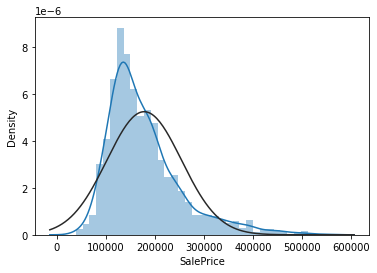

In [ ]:
submission = pd.DataFrame()
submission["Id"] = Id
submission["SalePrice"] = np.expm1(predict_test).astype(int)

sns.distplot(submission["SalePrice"], fit=norm)

In [ ]:
submission.to_csv("submission9.csv", index = False)

In [ ]:
submission

,Id,SalePrice
0,1461,130140
1,1462,161349
2,1463,189398
3,1464,195722
4,1465,186452
...,...,...
1454,2915,82720
1455,2916,86362
1456,2917,134065
1457,2918,120649


In [ ]:
submission

,Id,SalePrice
0,1461,122726
1,1462,158471
2,1463,188408
3,1464,196854
4,1465,180852
...,...,...
1454,2915,78598
1455,2916,90115
1456,2917,132689
1457,2918,123419


In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=2022)

avg_losses_f = []
avg_val_losses_f = []

In [ ]:
for fold_, (trn_, val_) in enumerate(folds.split(X)):
    print("fold {}".format(fold_ + 1))

    x_train, y_train = X[trn_],y[trn_]
    x_valid, y_valid = X[val_],y[val_]

    for epoch in range(epochs):
        start_time = time.time()
        model.train()
        avg_loss = 0.
        for i, (x_batch, y_batch) in enumerate(train_loader):
            y_pred = model(x_batch)

            loss = loss_fn(y_pred, y_batch.float())
            optimizer.zero_grad()       # clear gradients for next train
            loss.backward()             # -> accumulates the gradient (by addition) for each parameter
            optimizer.step()            # -> update weights and biases
            avg_loss += loss.item() / len(train_loader)
            # avg_auc += round(roc_auc_score(y_batch.cpu(),y_pred.detach().cpu()),4) / len(train_loader)
        model.eval()

        valid_preds_fold = np.zeros((x_valid.size(0), classes))

        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            y_pred = model(x_batch).detach()

            avg_val_loss += loss_fn(y_pred, y_batch.float()).item() / len(valid_loader)
            valid_preds_fold[i * batch_size:(i + 1) * batch_size] = softmax(y_pred.cpu().numpy())

        elapsed_time = time.time() - start_time
        print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f} \t time={:.2f}s'.format(epoch + 1, epochs, avg_loss, avg_val_loss, elapsed_time))

        avg_losses_f.append(avg_loss)
        avg_val_losses_f.append(avg_val_loss)
    oof_preds[val_] = valid_preds_fold
result = np.argmax(oof_preds, axis=1)